In [35]:
import pandas as pd
import numpy as np
df=pd.read_csv('synthetic_loan_data.csv')
df.head()


,income,credit_score,employment_status,loan_amount,loan_term,loan_approved
0,110619,514,Unemployed,18378,Short-term,0
1,24015,725,Employed,16990,Long-term,0
2,110945,744,Unemployed,47377,Short-term,0
3,128109,595,Unemployed,36969,Long-term,0
4,98647,624,Unemployed,47632,Long-term,0


In [36]:
# Encoding categorical variables
df['employment_status'] = df['employment_status'].map({'Employed': 1, 'Self-employed': 2, 'Unemployed': 0})
df['loan_term'] = df['loan_term'].map({'Short-term': 1, 'Long-term': 2})

# Features (X) and target variable (y)
X = df.drop('loan_approved', axis=1)
y = df['loan_approved']

# Display the first few rows after encoding
df.head()


,income,credit_score,employment_status,loan_amount,loan_term,loan_approved
0,110619,514,0,18378,1,0
1,24015,725,1,16990,2,0
2,110945,744,0,47377,1,0
3,128109,595,0,36969,2,0
4,98647,624,0,47632,2,0


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the training and test sets
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (70, 5)
Test set shape: (30, 5)


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display scaled features
X_train_scaled[:5]


array([[-0.10109571, -0.57826812,  1.18846138,  0.55668404, -1.05887304],
       [ 0.79776723,  0.54049181,  1.18846138,  0.39811451, -1.05887304],
       [-0.55162895,  0.52919121,  0.01673889,  1.27960642, -1.05887304],
       [ 0.47017577, -1.3693105 ,  1.18846138, -1.01238084, -1.05887304],
       [ 0.0208836 ,  1.04901906,  1.18846138, -0.99505422, -1.05887304]])

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Display predictions
print(f"Predictions: {y_pred}")


Predictions: [0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]


In [47]:
import pickle

# Model ko save karne ke liye
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)


In [48]:
import os
print("model.pkl exists:", os.path.exists("model.pkl"))

model.pkl exists: True


In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 86.67%
Confusion Matrix:
 [[23  3]
 [ 1  3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92        26
           1       0.50      0.75      0.60         4

    accuracy                           0.87        30
   macro avg       0.73      0.82      0.76        30
weighted avg       0.90      0.87      0.88        30



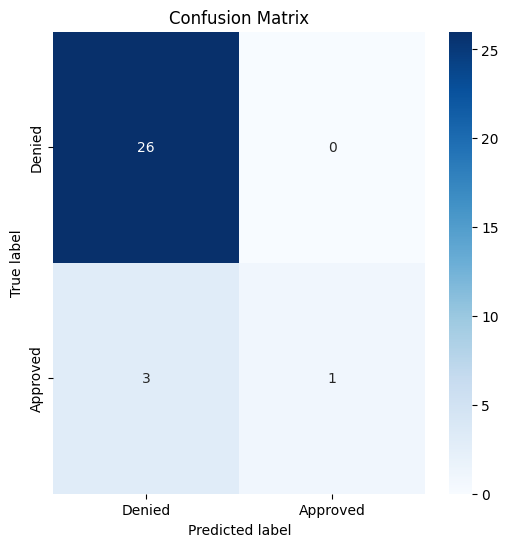

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Denied', 'Approved'], yticklabels=['Denied', 'Approved'])
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


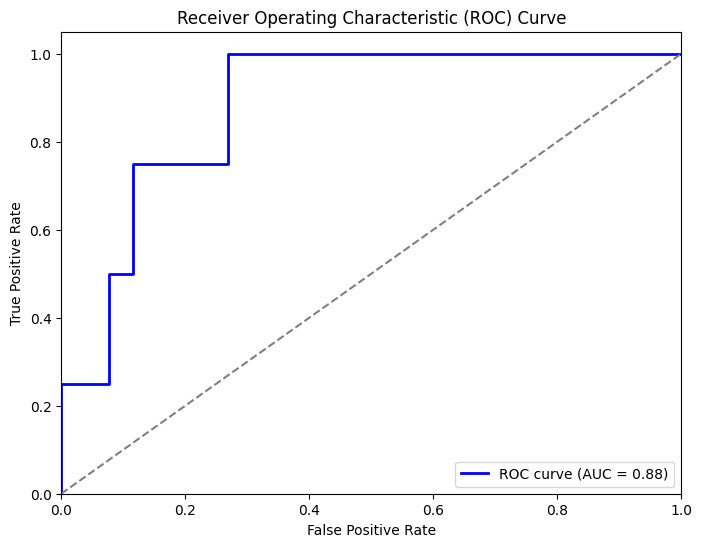

In [44]:
from sklearn.metrics import roc_curve,auc

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


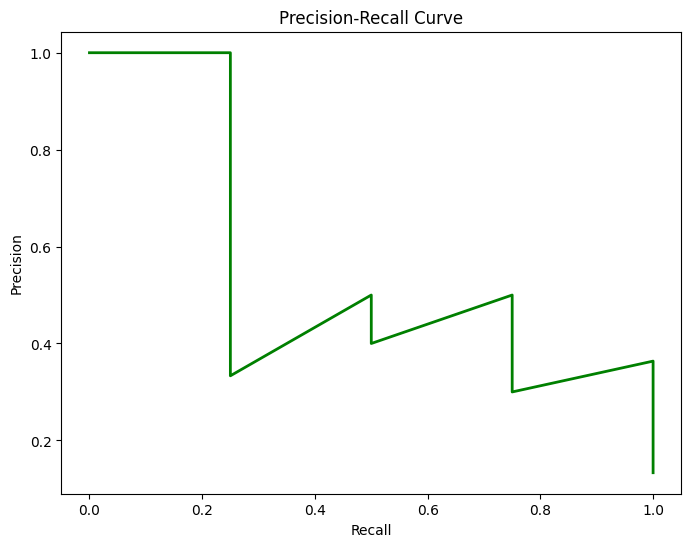

In [45]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds_pr = precision_recall_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [13]:
# Displaying the final accuracy score
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.90
